<a href="https://colab.research.google.com/github/lenocahya/ir_wisata_semarang/blob/main/index_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kompresi Index

In [1]:
import pandas as pd
import numpy as np

**Membaca Dataset Inverted index**

In [2]:
url = "https://raw.githubusercontent.com/lenocahya/ir_wisata_semarang/main/invertedIndex.csv"
df = pd.read_csv(url)
df.head(None)

,Terms,docFreq,postList
0,abad,4,"[29, 47, 44, 2]"
1,abdul,2,"[48, 46]"
2,acara,3,"[30, 65, 30]"
3,ada,16,"[14, 28, 70, 69, 68, 11, 36, 10, 63, 56, 35, 6..."
4,adalah,20,"[41, 33, 30, 38, 37, 35, 73, 57, 85, 15, 65, 8..."
...,...,...,...
1887,yunani,2,"[49, 45]"
1888,ziarah,1,[22]
1889,zipcoaster,1,[10]
1890,zona,1,[17]


## **Dictionary as String!**
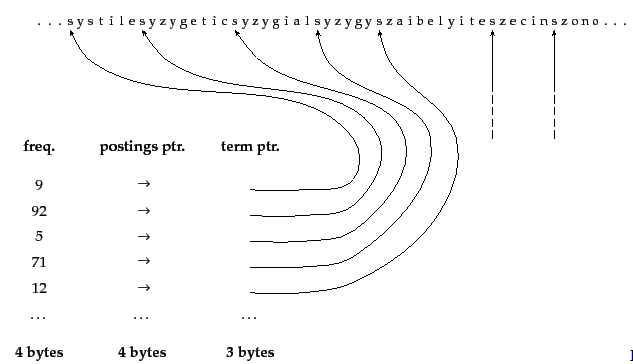

https://nlp.stanford.edu/IR-book/html/htmledition/dictionary-as-a-string-1.html

In [3]:
# Membuat dataframe baru
df_dict = pd.DataFrame(columns = ["Freq","Posting_ptr","Terms_ptr"])

df_dict["Freq"] = df["docFreq"]
df_dict["Posting_ptr"] = df["postList"]

df_dict


,Freq,Posting_ptr,Terms_ptr
0,4,"[29, 47, 44, 2]",NaN
1,2,"[48, 46]",NaN
2,3,"[30, 65, 30]",NaN
3,16,"[14, 28, 70, 69, 68, 11, 36, 10, 63, 56, 35, 6...",NaN
4,20,"[41, 33, 30, 38, 37, 35, 73, 57, 85, 15, 65, 8...",NaN
...,...,...,...
1887,2,"[49, 45]",NaN
1888,1,[22],NaN
1889,1,[10],NaN
1890,1,[17],NaN


In [4]:
# Membuat term string dan term pointer
term_str = ""
term_counter = 0
for i in range(df_dict.shape[0]):
    term = df["Terms"].iloc[i]
    term_str += term
    df_dict["Terms_ptr"].iloc[i] = term_counter
    term_counter += len(term)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
term_str

'abadabdulacaraadaadalahadaptasiadatadrenalinadvantureagakagamaagendakanagroagungairairnyaajaajakakanakarakhirakhirnyaakibatakomodasiaksesaksesorisaksiaktivitasalaalamalamialasalotalteralternatifamanambarawaananakandandaanekaanggunanginangklungangkutanannaantarantaraantaranyaantikapaapakahapiarabarabikaarangareaarenarenaargoaristokratarkeologiarsitekarsitekstunyaarsitekturartartinyaasalnyaasiaasinasistenasliasmaulaspalasriassumptaasuransiasyikatatapatasatasnyaatauatiatraksiatvavalokitesvaraawalawalnyaayamayoayooayunanbabadanbabatbagbagaibagaikanbagaimanabagibagianbahanbahasabahkanbaikbakalbakaubaksobakubakwanbaladewabalemongbalibalokbambubanbanaranbandengbandunganbangetbangsabangunanbanjirbankbantalanbantuanbanyakbanyubanyubirubanyukuningbarangbaratbarengbarongbarouquebarubasahbasahanbatubaturbawahbawangbawenbaxobebatuanbeberapabecakbedabegitubelandabelibeliaubemacambenangbencanabendabendunganbenggalabenihbentangbentukbentuknyaberadaberagamberaniberaromaberarsitekturberartiberasberasal

In [6]:
df_dict

,Freq,Posting_ptr,Terms_ptr
0,4,"[29, 47, 44, 2]",0
1,2,"[48, 46]",4
2,3,"[30, 65, 30]",9
3,16,"[14, 28, 70, 69, 68, 11, 36, 10, 63, 56, 35, 6...",14
4,20,"[41, 33, 30, 38, 37, 35, 73, 57, 85, 15, 65, 8...",17
...,...,...,...
1887,2,"[49, 45]",12208
1888,1,[22],12214
1889,1,[10],12220
1890,1,[17],12230


In [7]:
# Export to csv
df_dict.to_csv('compressed_index.csv',index=False)
# Export to txt
term_file = open("term_compress.txt", "w")
term_file.write(term_str)
term_file.close()

